In [83]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler

cars = pd.read_csv(r"C:\Users\minif\Downloads\Machine Learning Projects\cardata.csv")
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [104]:
cars['Markdown'] = np.where(
    cars['Present_Price'] != 0,
    100 - ((cars['Selling_Price'] / cars['Present_Price']) * 100) ,
    np.nan
)
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Markdown,Kms_Driven_Scaled
0,Activa 3g,2016,0.45,0.54,500,Petrol,Individual,Automatic,0,16.666667,-1.502504
1,Bajaj Avenger 220,2016,0.72,0.95,500,Petrol,Individual,Manual,0,24.210526,-1.502504
2,Hero Passion Pro,2016,0.45,0.55,1000,Petrol,Individual,Manual,0,18.181818,-1.479138
3,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,9.375000,-1.469792
4,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0,5.263158,-1.465119
...,...,...,...,...,...,...,...,...,...,...,...
288,corolla altis,2011,4.35,13.74,88000,Petrol,Dealer,Manual,0,68.340611,2.586467
289,fortuner,2012,14.50,30.61,89000,Diesel,Dealer,Automatic,0,52.629860,2.633198
290,corolla altis,2008,4.00,22.78,89000,Petrol,Dealer,Automatic,0,82.440737,2.633198
291,innova,2005,2.75,10.21,90000,Petrol,Individual,Manual,0,73.065622,2.679929


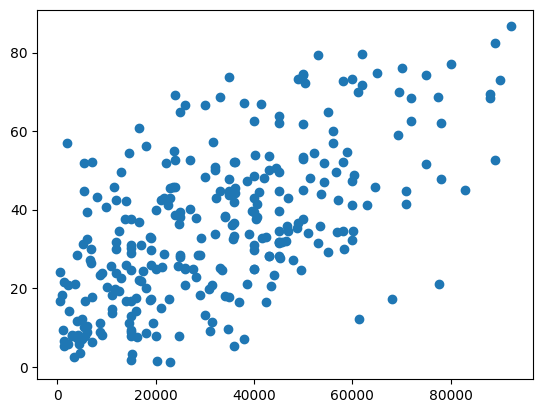

In [86]:
cars = cars.loc[cars['Kms_Driven'] < 100000] \
        .reset_index(drop=True).copy() #Removing extremeley driven cars and resetting index
scaler = StandardScaler()
cars['Kms_Driven_Scaled'] = scaler.fit_transform(cars[['Kms_Driven']])
plt.scatter(cars.Kms_Driven, cars.Markdown)
plt.show()

In [108]:
cars = cars.sort_values('Kms_Driven').reset_index(drop=True).copy()
cars.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Markdown,Kms_Driven_Scaled
0,Activa 3g,2016,0.45,0.54,500,Petrol,Individual,Automatic,0,16.666667,-1.502504
1,Bajaj Avenger 220,2016,0.72,0.95,500,Petrol,Individual,Manual,0,24.210526,-1.502504
2,Hero Passion Pro,2016,0.45,0.55,1000,Petrol,Individual,Manual,0,18.181818,-1.479138
3,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,9.375000,-1.469792
4,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0,5.263158,-1.465119
...,...,...,...,...,...,...,...,...,...,...,...
95,TVS Jupyter,2014,0.35,0.52,19000,Petrol,Individual,Automatic,0,32.692308,-0.637979
96,brio,2017,4.80,5.80,19000,Petrol,Dealer,Manual,0,17.241379,-0.637979
97,TVS Apache RTR 160,2012,0.60,0.81,19000,Petrol,Individual,Manual,0,25.925926,-0.637979
98,city,2016,8.35,9.40,19434,Diesel,Dealer,Manual,0,11.170213,-0.617697


In [106]:
def loss_function(a, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].Kms_Driven
        y = points.iloc[i].Markdown
        total_error += (y - (w * x + b)) ** 2
    total_error / float(len(points))
    return total_error

In [113]:
def gradient_descent(w_now, b_now, points, L):
    w_gradient = 0.0
    b_gradient = 0.0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].Kms_Driven
        y = points.iloc[i].Markdown

        w_gradient += -(2/n) * x * (y - (w_now * x + b_now))
        b_gradient += -(2/n) * (y - (w_now * x + b_now))

    w = w_now - w_gradient * L
    b = b_now - b_gradient * L
    return w, b

0
50
100
150
200
250
0.0009305647363006787 3.327044342503126e-07


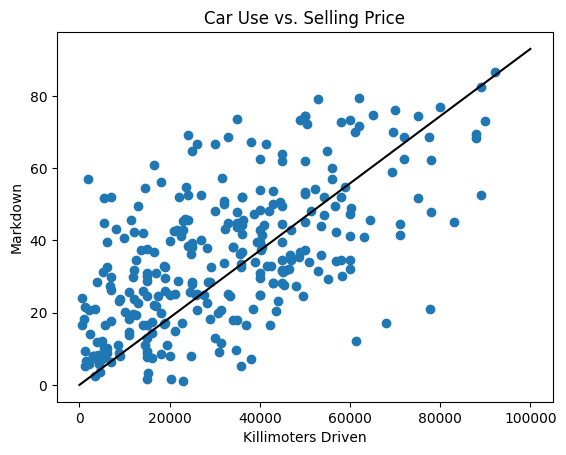

In [121]:
w = 0
b = 0
L = 0.0000000001 #Because the numbers were so high I had to substantially decrease the learning rate to allow for calculations
epochs = 300

for i in range(epochs):
    w, b = gradient_descent(w, b, cars, L)
    if(i % 50 == 0):
        print(i)

print(w, b)

plt.scatter(cars.Kms_Driven, cars.Markdown)

max = cars['Kms_Driven_Scaled'].max()
min = cars['Kms_Driven_Scaled'].min()
x_values = np.arange(0, 100000)
y_values = [w * x + b for x in x_values]
plt.plot(x_values, y_values, color="black", label="Regression Line")
plt.xlabel('Killimoters Driven')
plt.ylabel('Markdown')
plt.title('Car Use vs. Selling Price')
plt.show()